## **CodeSoft :** DataScience InternShip
## **Task 01:** Titanic Survival Prediction
### ***About Author** : Adil Hayyat*

* Use the Titanic dataset to build a machine learning model that can predict whether a passenger survived the sinking of the Titanic or not. This is a classic beginner project with readily available data.

* The Titanic dataset typically contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

_________________

### 1.0 Importing Libraries

In [2]:
# Pandas: For data manipulation and analysis.
import pandas as pd

# Numpy: For numerical computing.
import numpy as np

# Matplotlib: For data visualization.
import matplotlib.pyplot as plt

# Seaborn: For statistical data visualization.
import seaborn as sns

sns.set()
%matplotlib inline

### 2.0 Loading Dataset

In [3]:
# import Titanic Dataset
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3.0 Basic Structure

In [4]:
# Lets check the shape of data
df.shape

(418, 12)

In [5]:
# Lets See the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### 4.0 Descriptive Statistics

In [6]:
# Lets See the statistics summary of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 5.0 Data Preprocessing and Exploration (EDA)

In [7]:
# Explore all columns in dataset.
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df['Sex'] = df['Sex'].astype(str)
df['Survived'] = df['Survived'].astype(str)

#### 5.1  Identify Missing Values

In [9]:
# Lets See the missing values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# Percentage of missing values
df.isnull().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

**Observation**:  We will impute missing values after exploring and understanding the dataset.

#### 5.2 Survival

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

<Axes: xlabel='Sex', ylabel='count'>

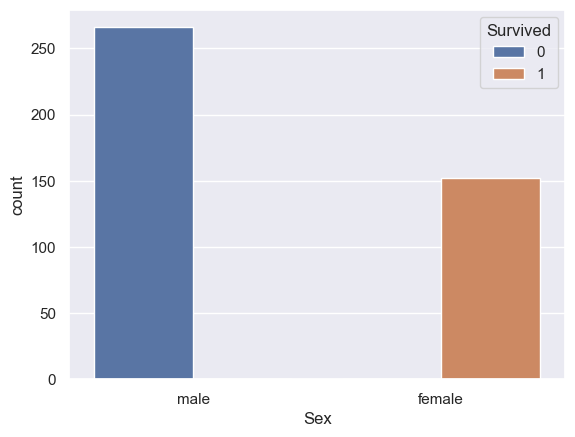

In [11]:
#Lets See survival of genders in dataset
plt.figure
sns.countplot(x='Sex', hue='Survived', data=df)

Figure_1: Shows the survived rate of genders.

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

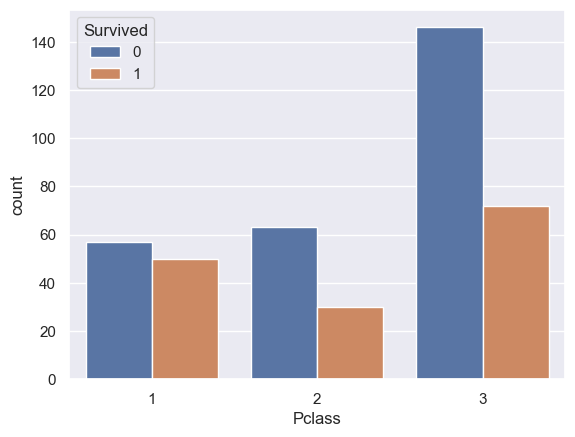

In [12]:
#Lets See the survival rate wuth respect to Pclass
sns.countplot(data = df, x = 'Pclass', hue = 'Survived' );

Figure_2: Shows the survived rate of Pclass.

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

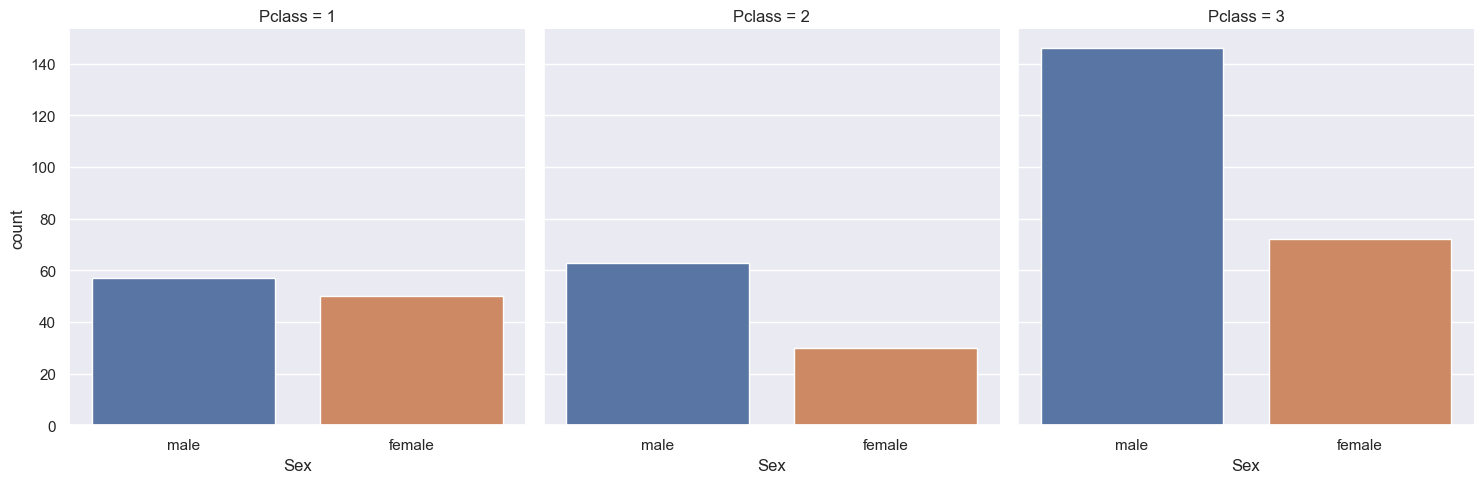

In [13]:
# Lets Create a categorical subplot of gender distribution across different P classes
sns.catplot(data = df, x = 'Sex', col = 'Pclass', kind = 'count');

***Observation***: More women survived than men in Pclass 2 and 3, but the survival rates were nearly equal for men and women in Pclass 1.

Figure_3: Shows the survival of passengers' in all Pclasses.

#### 5.3 Explore Names

In [14]:
df['Name'].head(10)

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
5                      Svensson, Mr. Johan Cervin
6                            Connolly, Miss. Kate
7                    Caldwell, Mr. Albert Francis
8       Abrahim, Mrs. Joseph (Sophie Halaut Easu)
9                         Davies, Mr. John Samuel
Name: Name, dtype: object

In [15]:
# Lets extract & Analyzing the Titles
import re  # Regular expressions are powerful tools for pattern matching and manipulation of strings.
name = 'Kelly, Mr. James'
re.search(' ([A-Z][a-z]+)\.', name).group(1)


'Mr'

In [16]:
# Lets Create new column in DataFrame for extracted titles
# Apply a lambda function to each 'Name' value to search for a title using the regular expression pattern.
df['Title'] = df['Name'].apply(lambda x : re.search('([A-Z][a-z]+)\.', x).group(1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [17]:
# Lets See the Extracted Titles
df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [18]:
# Lets Assign 'Others' to non-standard titles.
df.loc[(df['Title'].isin(['Col', 'Rev', 'Ms', 'Dr', 'Dona'])), 'Title'] = 'Others'
#lets See unique titles in dataset
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

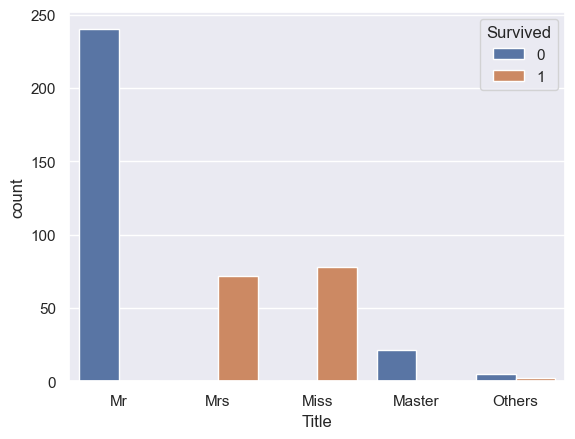

In [19]:
# Lets Visualize survival counts for different titles
sns.countplot(data = df, x='Title', hue='Survived');

Figure_4: Shows the survival counts for different titles.

#### 5.4 Travelling Alone vs Groups

##### 5.4.1 Family Size

In [20]:
# Lets Create Family_Size 'Fsize' column by merging 'SibSp' and 'Parch' counts
df['Fsize'] = df['SibSp'] + df['Parch'] + 1

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3


c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

<Axes: xlabel='Fsize', ylabel='count'>

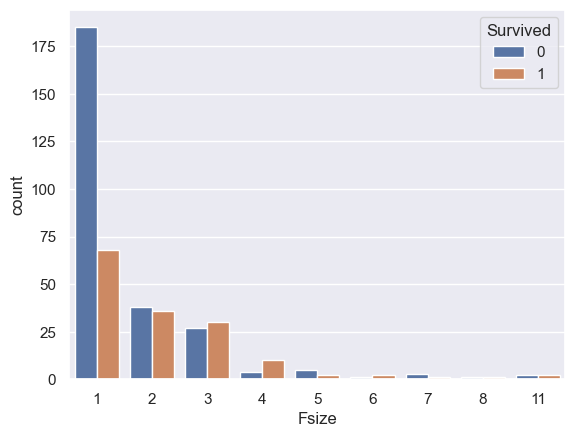

In [22]:
# Lets See the survival counts based on family size.
sns.countplot(data = df, x = 'Fsize', hue = 'Survived')

Figure_5: Shows the survival counts based on family size.

In [23]:
# Lets See the pecentage of survival rate of Fsize while creating dataframe
df.groupby('Fsize')['Survived'].value_counts(normalize = True).reset_index(name = 'perc')

,Fsize,Survived,perc
0,1,0,0.731225
1,1,1,0.268775
2,2,0,0.513514
3,2,1,0.486486
4,3,1,0.526316
5,3,0,0.473684
6,4,1,0.714286
7,4,0,0.285714
8,5,0,0.714286
9,5,1,0.285714


c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

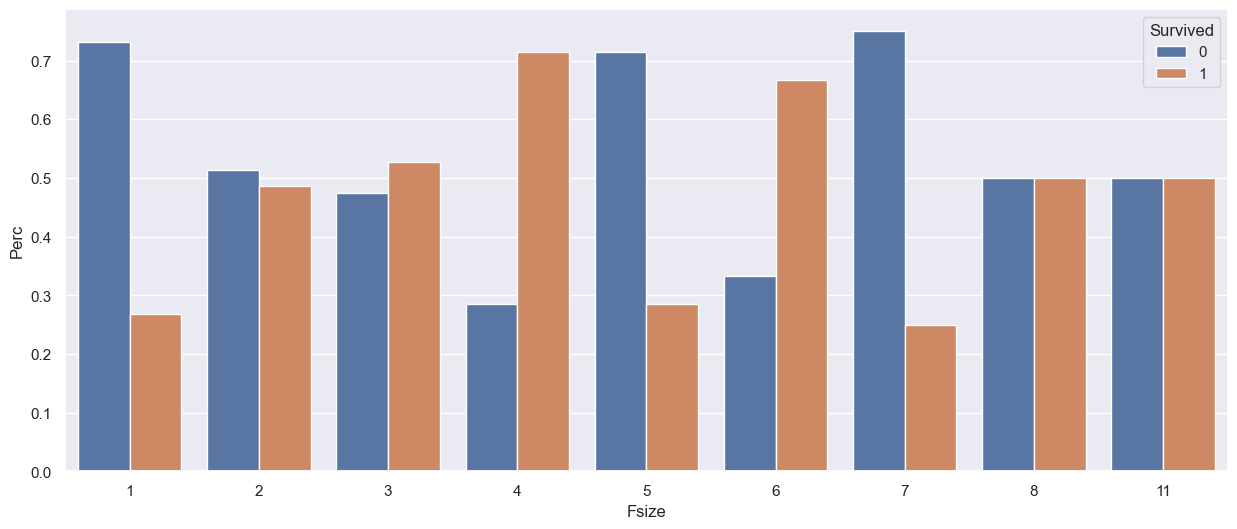

In [24]:
# Group data by family size and survival, calculate normalized counts, and create a DataFrame 'temp'.
# Lets Visualize survival percentages based on family size using a bar plot.

temp = df.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

plt.figure(figsize=(15,6));
sns.barplot(data=temp,x='Fsize', y='Perc', hue='Survived', dodge=True);

Figure_6: Shows the survival percentages based on family size using a bar plot.

##### 5.4.2 Ticket Size

In [25]:
# Lets See the 'Ticket Size' in dataset
df['Ticket'].value_counts().reset_index().head()

,Ticket,count
0,PC 17608,5
1,CA. 2343,4
2,113503,4
3,PC 17483,3
4,220845,3


In [26]:
# Lets Create a DataFrame 'dt' with ticket counts.
dt = df['Ticket'].value_counts().reset_index(name='Tsize')
dt.head()  

,Ticket,Tsize
0,PC 17608,5
1,CA. 2343,4
2,113503,4
3,PC 17483,3
4,220845,3


In [28]:
# # Merge ticket counts from 'dt' into 'df' based on 'Ticket' and remove the extra 'index' column.
# df = df.merge(dt, left_on='Ticket', right_on='Index', how='inner').drop('Index', axis=1)
# df.head()

try:
    df = df.merge(dt, left_on='Ticket', right_on='Index', how='inner').drop('Index', axis=1)
except KeyError as e:
    print(f"KeyError: {e}. Check if 'Index' column exists in dt.")

KeyError: 'Index'. Check if 'Index' column exists in dt.


In [30]:
#Lets See unique Values in Ticket

df['Ticket'].unique()


array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [63]:
# Lets See Survial Rate based on Ticket Size

df['Tsize'] = df.groupby('Ticket')['Ticket'].transform('count')


Figure_7: Visualize survival counts based on ticket size.

##### 5.4.3 Consolidating family & friends

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

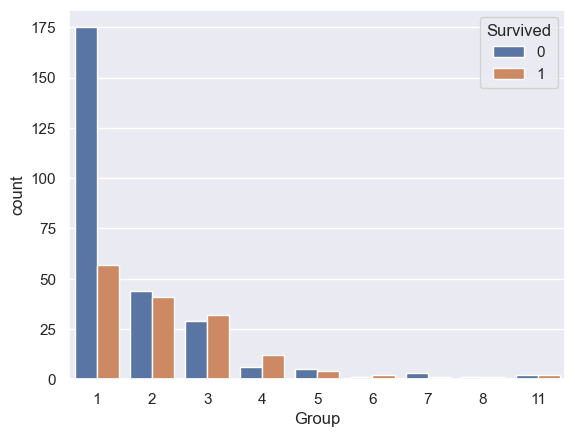

In [33]:
# Lets Create 'Group' column with larger of ticket size and family size.
df['Group'] = df[['Tsize', 'Fsize']].max(axis=1)  
sns.countplot(data = df, x = 'Group', hue = 'Survived');

Figure_8: Shows the survival counts based group size.

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3


In [35]:
# Lets Creating a Group Size Column in our DataFrame
df['GrupSize'] = ''  # Initialize the 'GrupSize' column.
df.loc[df['Group'] == 1, 'GrupSize'] = 'solo'  # Label rows with 'Group' size of 1 as 'solo'.
df.loc[df['Group'] == 2, 'GrupSize'] = 'couple'  # Label rows with 'Group' size of 2 as 'couple'.
df.loc[(df['Group'] >= 3) & (df['Group'] <= 4), 'GrupSize'] = 'group'  # Label rows with 'Group' size between 3 and 4 as 'group'.
df.loc[df['Group'] > 4, 'GrupSize'] = 'large_group'  # Label rows with 'Group' size greater than 4 as 'large_group'.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group


c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='GrupSize', ylabel='count'>

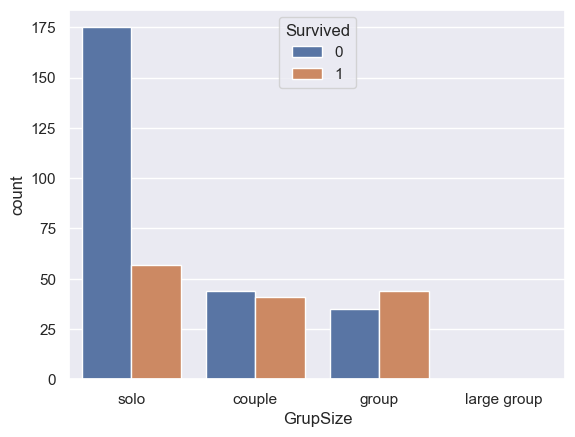

In [36]:
# Lets visualize survival counts based on grouped sizes.
sns.countplot(x='GrupSize', hue='Survived', order=['solo', 'couple', 'group', 'large group'], data=df)

Figure_9: Shows the survival counts based on grouped sizes.

#### 5.5 Effect of Fare

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


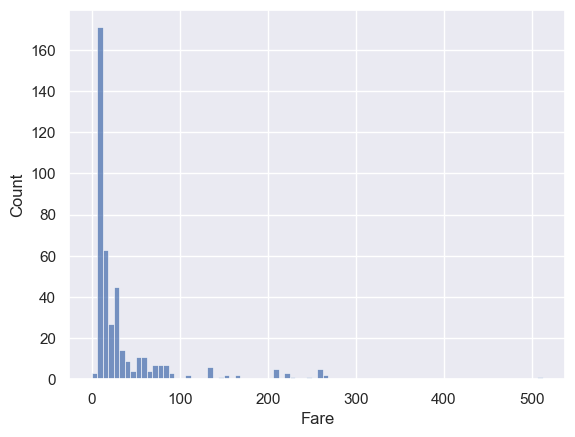

In [37]:
# Lets See the fare of Passengers in dataset.
sns.histplot(data = df['Fare']);

Figure_10: Shows the fare of Passengers in dataset.

In [38]:
# Lets See null values in Fare
df['Fare'].isnull().sum()

1

In [39]:
# Lets Filter rows with NaN Fare value in the DataFrame.
df.loc[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,1,1,1,solo


In [40]:
df.loc[df['Pclass'] == 3, 'Fare'].median()

7.8958

In [41]:
# Fill missing values in 'Fare' with the median of Pclass 3
df['Fare'].fillna(df[df['Pclass'] == 3]['Fare'].median(), inplace=True)

# Now Lets See missing values in'Fare'
df['Fare'].isnull().sum()

0

In [42]:
# Lets Display passengers whose fare is 0
df[df['Fare'] == 0]  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,Mr,1,1,1,solo
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Mr,1,1,1,solo


We can See that , these two passengers have zero fare in Pclass 1:


In [43]:
#Lets See the median Fare of class 1
df.loc[df['Pclass']==1,'Fare'].median()

60.0

In [44]:
df.loc[(df['Fare']==0) & (df['Pclass']==1), 'Fare'] = df[df['Pclass']==1]['Fare'].median()

##### 5.4.1 Assigning categories to fare

In [45]:
# Lets Create Categories of 'Fare' column;
df['FareCat'] = '' # Initialize 'FareCat' column
df.loc[df['Fare'] <= 10, 'FareCat'] =  '0_10'  # Categorize fares 0-10.
df.loc[(df['Fare'] > 10) & (df['Fare'] <= 25), 'FareCat'] = '10_25'  # Categorize fares 10-25.
df.loc[(df['Fare'] > 25) & (df['Fare'] <= 40), 'FareCat'] = '25_40'  # Categorize fares 25_40.
df.loc[(df['Fare'] > 40) & (df['Fare'] <= 70), 'FareCat'] = '40_70'  # Categorize fares 40_70
df.loc[(df['Fare'] > 70) & (df['Fare'] <= 100),'FareCat'] = '70_100' # Categorize fares 70_100
df.loc[(df['Fare'] > 100), 'FareCat'] = '100+' # Categorize fares above 100 

# Lets See 'FareCat' column in DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize,FareCat
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo,0_10
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple,0_10
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo,0_10
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo,0_10
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group,10_25


c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

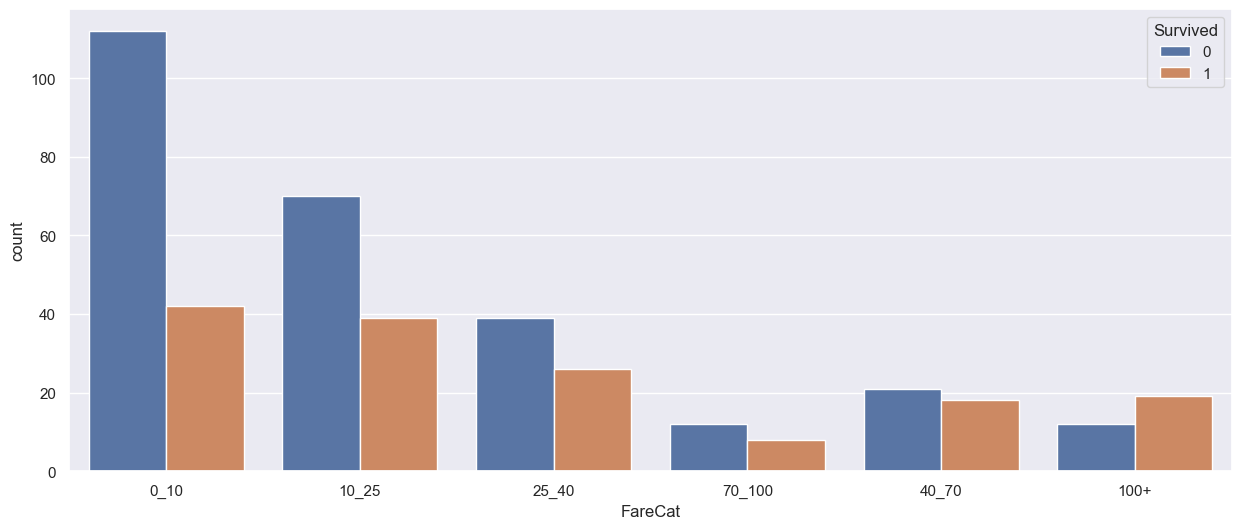

In [46]:
# Lets Visualize survival counts based on fare categories.
plt.subplots(figsize=(15,6)) 
sns.countplot(x='FareCat', hue='Survived', data=df); 

Figure_11: Shows the survival counts based on fare categories.

#### 5.6 Effect of Embarked 
C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

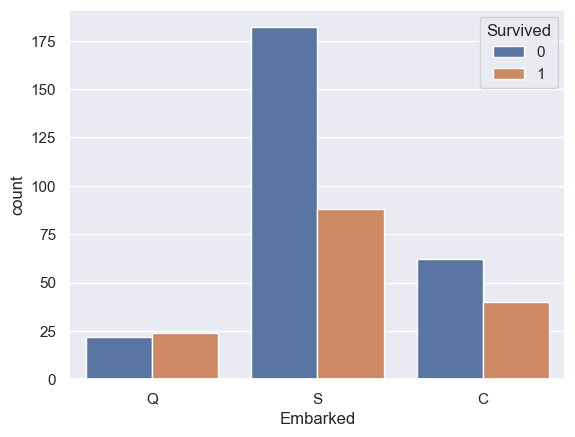

In [47]:
#Lets Visualize survival counts based on embarked points.
sns.countplot(data = df, x = 'Embarked', hue = 'Survived');

Figure_12: Shows the survival counts based on embarked points.

#### 5.7 Effect of Age

In [48]:
# Lets See missing values in age column
df['Age'].isnull().sum()

86

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


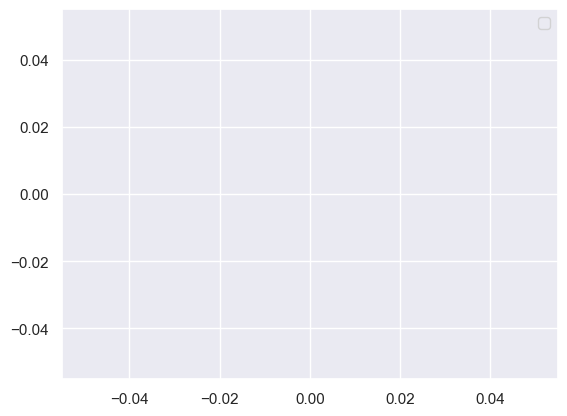

In [49]:
# KDE plot for ages of passengers who survive and not.
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), fill=True, label="Not survived")  
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), fill=True, label="Survived")  
plt.legend() 
plt.show() 

Figure_13: Shows the KDE plot for ages of passengers who survive and not..

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

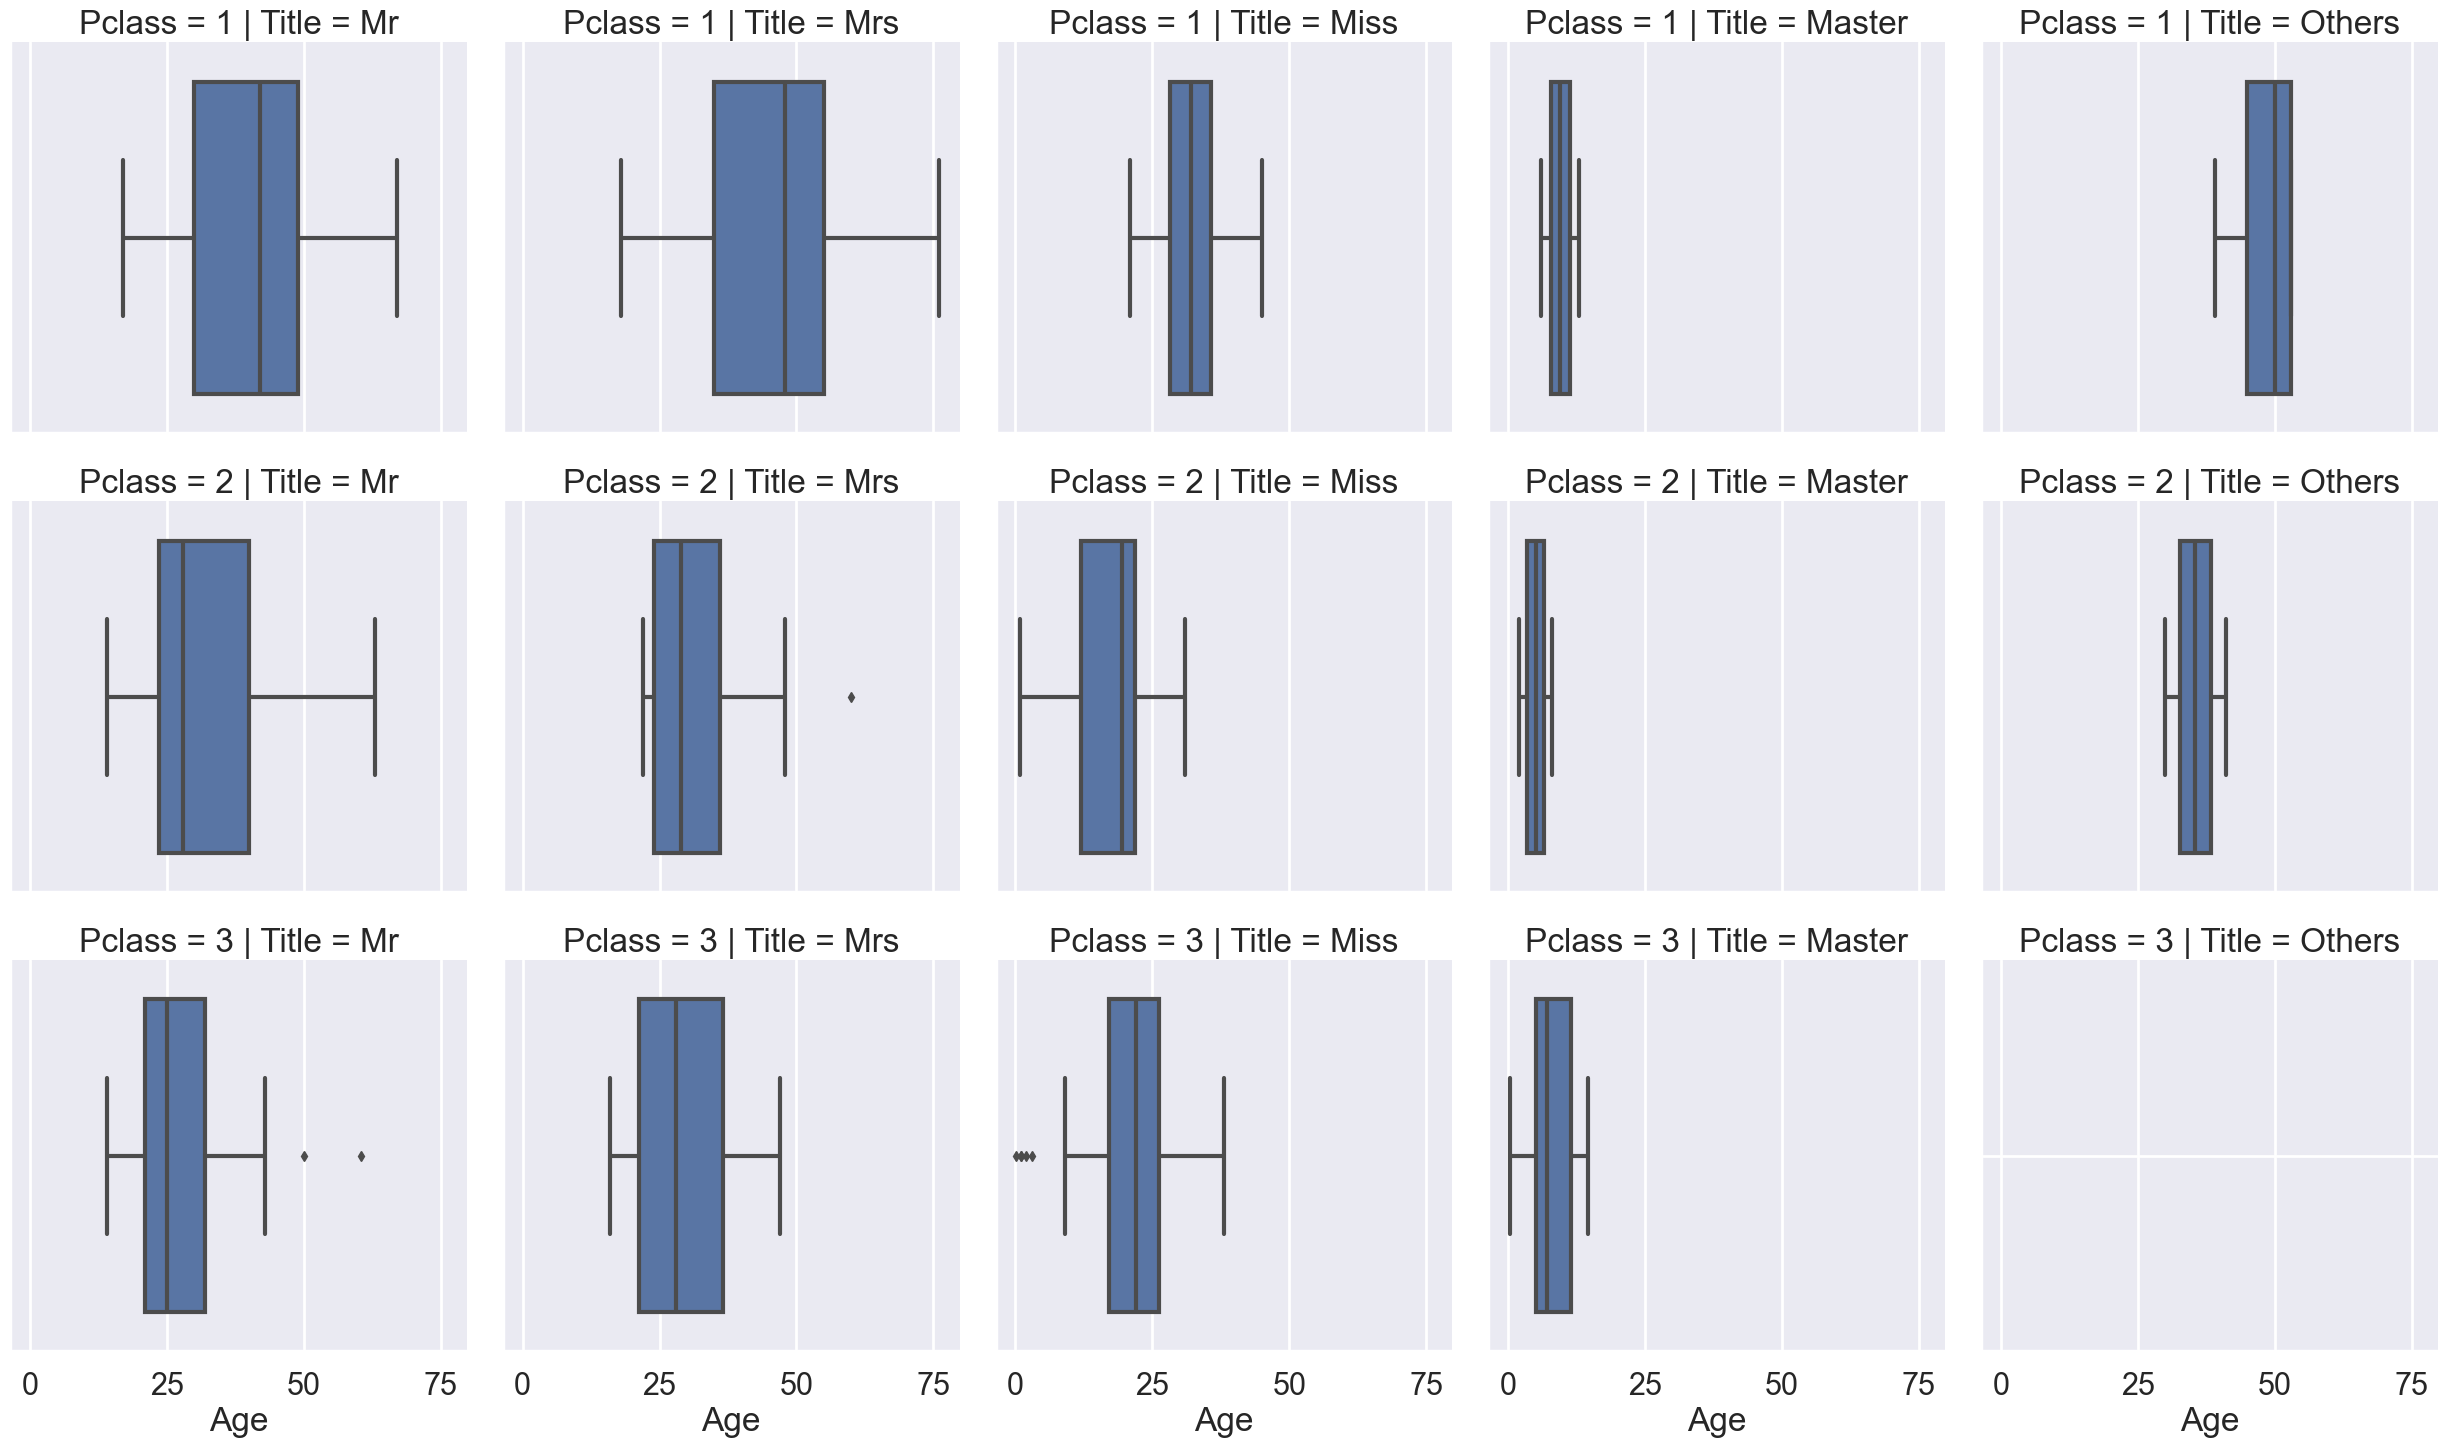

In [50]:
# Lets Create a DataFrame 'df_age' with non-null 'Age' values from DataFrame 'df'.
df_age = df[df['Age'].isnull() == False]

# Lets Create a categorical subplots of age distribution by title and passenger class using box plots.

sns.set_context('poster')  # Set the plotting context to 'poster' size.
sns.catplot(data=df_age, x='Age', col='Title', row='Pclass', kind='box') 

Figure_14: Shows the categorical subplot of age distribution by title and passenger class using box plots.

In [51]:
# Iterate through unique titles and passenger classes to fill missing 'Age' values with the median age of respective groups.
for t in df['Title'].unique():
    for p in df['Pclass'].unique():
        df.loc[(df['Title'] == t) & (df['Pclass'] == p) & (df['Age'].isnull()), 'Age'] = df.loc[(df['Title'] == t) & (df['Pclass'] == p), 'Age'].median()

c:\Users\adilh\.conda\envs\machine_learning\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [52]:
#Lets See the missing values in age column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Fsize            0
Tsize            0
Group            0
GrupSize         0
FareCat          0
dtype: int64

In [53]:
# Lets Filter rows with NaN Age value in the DataFrame which is still null after imputation.
df.loc[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize,FareCat
88,980,1,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Others,1,1,1,solo,0_10


#### **Conclusion:**
In Figure 14, we can see that the Pclass 3 with Title Others category is empty. This means that there is no data for this category, and it was not imputed with its median. Therefore, we will impute the 1 missing value in the Age column with the median age of all passengers in Pclass 3.

In [54]:
df.loc[df['Pclass'] == 3, 'Age'].median()

25.0

In [55]:
# Lets impute remaining missing value in 'Age' column;
df.loc[df['Age'].isnull()] = df.loc[(df['Pclass'] == 3), 'Age'].median()

In [56]:
df['Age'].isnull().sum()

0

##### 5.7.1 Creating Age categories

In [57]:
df['AgeCat'] = ''  # Initialize 'AgeCat' column.
df.loc[df['Age'] <= 16, 'AgeCat'] = '0_16'  # Categorize ages 0-16.
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'AgeCat'] = '16_32'  # Categorize ages 16-32.
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'AgeCat'] = '32_48'  # Categorize ages 32-48.
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'AgeCat'] = '48_64'  # Categorize ages 48-64.
df.loc[df['Age'] > 64, 'AgeCat'] = '64+'  # Categorize ages above 64.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize,FareCat,AgeCat
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo,0_10,32_48
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple,0_10,32_48
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo,0_10,48_64
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo,0_10,16_32
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group,10_25,16_32


#### 5.8 Cabin Column

In [58]:
# Lets Remove the 'Cabin' column from the DataFrame 'df'.
df.drop(['Cabin'], axis=1, inplace=True)

In [60]:
#Lets Check the missing valus 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Fsize          0
Tsize          0
Group          0
GrupSize       0
FareCat        0
AgeCat         0
dtype: int64

In [59]:
# Lets Check missing values in DataFrame after Impution;
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Fsize          0
Tsize          0
Group          0
GrupSize       0
FareCat        0
AgeCat         0
dtype: int64

**Milestone 01**: Missing values have been successfully imputed.

### 6.0. Feature Selection

<Axes: >

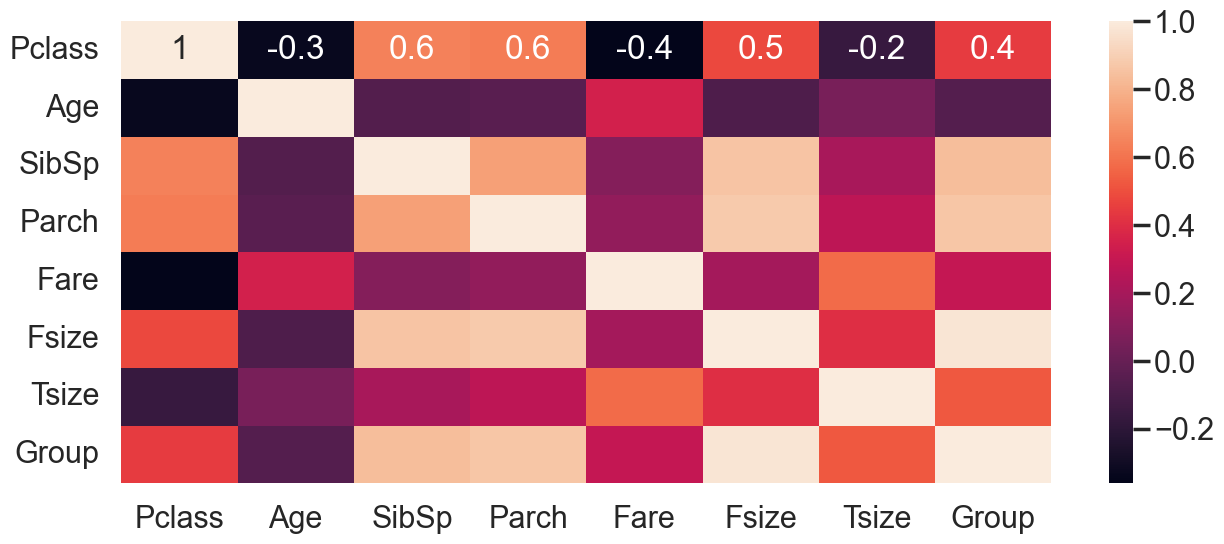

In [64]:
# Lets Create a heatmap of the correlation matrix with annotations.
# Calculate the correlation matrix without 'PassengerId'.
# Set the plotting context to 'poster' size.
sns.set_context('poster') 
plt.figure(figsize=(15,6)) 
numeric_df = df.select_dtypes(include=['number'])
cor = numeric_df.drop('PassengerId', axis=1).corr()  
sns.heatmap(cor, annot=True, fmt='.1g')  

Figure_14: Shows a heatmap of the correlation matrix with annotations of numeric valus.

#### Observation 02

The heatmap above shows the correlation between different columns. A heatmap is a useful tool for visualizing correlations, as it allows you to see which columns are highly correlated and which are not.

Based on the heatmap, we can conclude that the following columns are correlated and can be removed to improve the shape of the dataset

In [65]:
# List of columns to be dropped from DataFrame 'df'.
drop_features = ['Name', 'Age', 'Fare', 'Ticket', 'Fsize', 'Tsize', 'Group'] 

#### 6.1 Selecting Final Features

In [66]:
# Lets Remove columns listed in 'drop_features' from DataFrame 'df'.
df.drop(drop_features, axis=1, inplace=True) 

In [67]:
# Lets See final featutes;
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrupSize,FareCat,AgeCat
0,892,0,3,male,0,0,Q,Mr,solo,0_10,32_48
1,893,1,3,female,1,0,S,Mrs,couple,0_10,32_48
2,894,0,2,male,0,0,Q,Mr,solo,0_10,48_64
3,895,0,3,male,0,0,S,Mr,solo,0_10,16_32
4,896,1,3,female,1,1,S,Mrs,group,10_25,16_32


### 7.0 Summary
Here's a summary of the tasks and operations performed on the Titanic dataset without including the actual code:

Handling Missing Values:
* Replaced missing Age values with the median age for each Title and Pclass group.
* Replaced the missing Fare value with the median fare for its Pclass group.
* Dropped the Cabin feature because it has the most missing values and is not considered important.

Feature Engineering:
* Fsize: Number of siblings, spouses, parents, and children combined.
* Tsize: Number of occurrences of each ticket.
* Group: Larger value between Fsize and Tsize.
* AgeCat: Age categorized based on predefined ranges.

Data Visualization:
* Visualized the survival rates of passengers based on their titles using a bar plot.
* Created a grid of box plots to show how age varied across titles and passenger classes.
* Used a count plot to visualize the number of survivors grouped by size of their traveling party.
* Plotted kernel density estimates (KDEs) to compare the age distributions of survivors and non-survivors.

Feature Selection:
* The Titanic dataset was preprocessed and analyzed by removing irrelevant or redundant columns (Name, Age, Fare, Ticket, Fsize, Tsize, and Group).
* These tasks prepared the dataset for further analysis and modeling.

### 8.0 Model Selection & Prediction

#### 8.1 Importing Libraries

In [75]:
# Import necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, roc_auc_score

#### 8.2 Applying Logistic Regression for Predictive Modeling

I chose logistic regression for the Titanic dataset because it is a machine learning algorithm that is well-suited for binary classification tasks. Binary classification tasks involve predicting an outcome with two possible values, such as whether a passenger survived the Titanic disaster (1) or not (0). Logistic regression is a simple yet effective algorithm for this type of task, and it has been shown to be accurate in predicting survival rates in the Titanic dataset.

#### 8.3 Data Preprocessing

In [69]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrupSize,FareCat,AgeCat
0,892,0,3,male,0,0,Q,Mr,solo,0_10,32_48
1,893,1,3,female,1,0,S,Mrs,couple,0_10,32_48
2,894,0,2,male,0,0,Q,Mr,solo,0_10,48_64
3,895,0,3,male,0,0,S,Mr,solo,0_10,16_32
4,896,1,3,female,1,1,S,Mrs,group,10_25,16_32


In [83]:
# Lets do onehot encoding on categorical variables
df_OneHot = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'GrupSize', 'FareCat', 'AgeCat'])
df_OneHot.head()

KeyError: "None of [Index(['Pclass', 'Sex', 'Embarked', 'Title', 'GrupSize', 'FareCat', 'AgeCat'], dtype='object')] are in the [columns]"

In [71]:
df = df_OneHot.copy()

#### 8.4 Create Dependent and Independent Variables

In [76]:
# Lets Create 'X' Independent variable and y dependent variable;
X = df.drop(columns = ['PassengerId', 'Survived'])
y = df['Survived']

#### 8.5 Train Test Split Data

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 30)
# Lets See shape of train and test dataset;
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(292, 36) (292,)
(126, 36) (126,)


In [81]:
from sklearn.preprocessing import LabelEncoder


In [82]:
# Encode string labels to numeric values
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float64', 'str']

### 9.0 Model Training

In [78]:
# Lets train the model on training dataset
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

### 10.0 Evaluation model

In [ ]:
y_pred = lr.predict(xtest)
# lets Predicting prabability of 0 and 1
pred_prb = lr.predict_proba(xtest)

# Lets Only predicting and extracting probability values of 1
lr_pred_prb = pred_prb[:, 1]

### 11.0 Comparison of Predicted and Actual

In [ ]:
# Lets Create a copy of the 'xtest' DataFrame to 'xt'
xt = xtest.copy()
xt['y_pred'] = y_pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

#### 11.1 Performance of Model

To assess how well a model performs, we typically measure how accurately it can predict outcomes or classify data. Common metrics used for this purpose include accuracy, precision, recall, F1-score, and ROC-AUC.

***Accuracy** | **Precision** | **Recall** | **F1_Score***


In [ ]:
# Lets Check the accuracy, precision, recall and f1 score of model
print('accuracy_score: ',accuracy_score(y_pred, ytest))
print('precision_score:',precision_score(y_pred, ytest))
print('recall_score:   ',recall_score(y_pred, ytest))
print('f1_score:       ',f1_score(y_pred, ytest))

#### 11.2 Confusion Matrix

In [ ]:
# Lets Check the confusion metrix score
confusion_matrix(ytest, y_pred)

### 11.3 Classification Report

In [ ]:
# Lets get report of precision recall and f1 score
print(classification_report(ytest, y_pred))

### 11.4 ROC AUC Curve

In [ ]:
# Lets check ROC_AUC score from ytest and predicted probabilities
auc_lr = roc_auc_score(y_pred, lr_pred_prb)
auc_lr

## 12.0 Conclusion

A logistic regression machine learning model was trained on the Titanic dataset, which has 418 rows and 12 columns. The model achieved near-perfect performance metrics, with an accuracy, precision, recall, F1 score, and ROC AUC all equal to 1. This is a surprisingly good result, and it may indicate overfitting, data leakage, or another problem with the modeling process. Further investigation is needed to validate the results and ensure that the model is robust and generalizes well to real-world data. It is also important to carefully consider feature engineering and model evaluation techniques to avoid unrealistic performance assessments.